In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [75]:
df=pd.read_csv('/kaggle/input/company-bankruptcy-prediction/data.csv')
df.columns = df.columns.str.strip()
pd.set_option('display.max_columns', None)                                  
pd.set_option('display.float_format', '{:.10f}'.format)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.3705942573,0.4243894461,0.4057497725,0.6014572133,0.6014572133,0.9989692032,0.7968871459,0.8088093609,0.3026464339,0.7809848502,0.0001256969,0.0000000000,0.4581431435,0.0007250725,0.0000000000,0.1479499389,0.1479499389,0.1479499389,0.1691405881,0.3116644267,0.0175597804,0.0959205276,0.1387361603,0.0221022784,0.8481949945,0.6889794628,0.6889794628,0.2175353862,4980000000.0000000000,0.0003269773,0.2630999837,0.3637252710,0.0022589633,0.0012077551,0.6299513020,0.0212659244,0.2075762615,0.7924237385,0.0050244547,0.3902843544,0.0064785025,0.0958848340,0.1377573335,0.3980356983,0.0869565217,0.0018138841,0.0034873643,0.0001820926,0.0001165007,0.0329032258,0.0341641820,0.3929128695,0.0371353016,0.6727752925,0.1666729588,0.1906429591,0.0040944060,0.0019967709,0.0001473360,0.1473084504,0.3340151713,0.2769201582,0.0010359900,0.6762691762,0.7212745515,0.3390770068,0.0255923680,0.9032247712,0.0020216130,0.0648557077,701000000.0000000000,6550000000.0000000000,0.5938305040,458000000.0000000000,0.6715676536,0.4242057622,0.6762691762,0.3390770068,0.1265494878,0.6375553953,0.4586091477,0.5203819179,0.3129049481,0.1182504766,0,0.7168453432,0.0092194400,0.6228789594,0.6014532901,0.8278902140,0.2902018928,0.0266006308,0.5640501123,1,0.0164687409
1,1,0.4642909375,0.5382141300,0.5167300177,0.6102350855,0.6102350855,0.9989459782,

In [76]:
pd.set_option('display.float_format', '{:.10f}'.format)
df.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.4936869302,0.5394679459,0.5432303657,0.6044552386,0.6044624454,0.9989920815,0.7974089661,0.8093310617,0.3035102658,0.7815877991,0.0001510213,4500000000.0000000000,0.4637343466,0.0001790179,0.1133717988,0.1750452994,0.1750452994,0.1750452994,0.2166020611,0.3209662588,0.0207662175,0.0982004723,0.1721021315,0.0223737592,0.8482045116,0.6897780775,0.6897780775,0.2176352558,7070000000.0000000000,0.0004501771,0.2645173322,0.3801553593,0.0104505134,0.0054573561,0.6314149806,0.0066551765,0.1246183148,0.8753816852,0.0051504554,0.3738232051,0.0053658477,0.0982217011,0.1711107760,0.4048039784,0.1034482759,0.0006898441,0.0091769598,40300000.0000000000,0.0001429781,0.0279032258,0.0063481339,0.3925962778,0.0063124730,0.8177693625,0.3128402555,0.5784548244,0.0994807767,0.0054691945,0.0050715483,0.1038381294,0.3462244154,0.2775431008,0.0132118315,0.7868884434,0.7367159607,0.3309138054,0.0017922367,0.9256109681,0.0022656285,0.0190596527,0.0002294154,0.0001244230,0.5939850305,0.0001077940,0.6715696818,0.4003380967,0.7868884434,0.3309138054,0.1126216012,0.6398062832,0.4586392654,0.5871781758,0.3140629669,0.0279506686,0,0.7999270353,0.0004655105,0.6236195106,0.6044545642,0.8403589596,0.2796055449,0.0270642689,0.5661932111,1,0.0298901444
6815,0,0.4751620923,0.5382686437,0.5241715295,0.5983078453,0.5983078453,0.9989921971,0.7

In [77]:
print(df.columns.tolist())

['Bankrupt?', 'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth R

In [78]:
df.shape

(6819, 96)

In [79]:
#checking for null values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B) 

In [80]:
df.dtypes

Bankrupt?                                                    int64
ROA(C) before interest and depreciation before interest    float64
ROA(A) before interest and % after tax                     float64
ROA(B) before interest and depreciation after tax          float64
Operating Gross Margin                                     float64
Realized Sales Gross Margin                                float64
Operating Profit Rate                                      float64
Pre-tax net Interest Rate                                  float64
After-tax net Interest Rate                                float64
Non-industry income and expenditure/revenue                float64
Continuous interest rate (after tax)                       float64
Operating Expense Rate                                     float64
Research and development expense rate                      float64
Cash flow rate                                             float64
Interest-bearing debt interest rate                        flo

In [81]:
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

# Scale only X, not y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

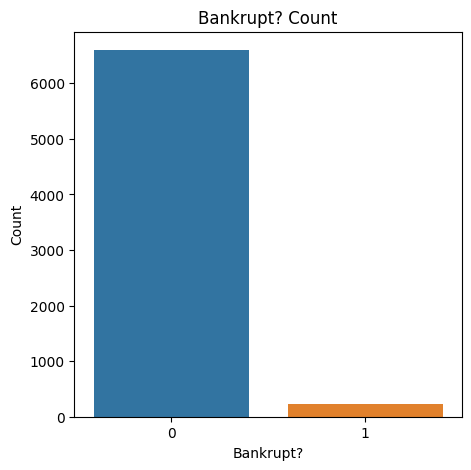

In [83]:
sns.countplot(x='Bankrupt?', data=df)
plt.title('Bankrupt? Count')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.show()

In [84]:
# Storing feature matrix in X And Target in vector y
X = df.drop('Bankrupt?',axis=1)
y = df['Bankrupt?']

In [85]:
X.shape

(6819, 95)

In [86]:
y.shape

(6819,)

In [87]:
# Oversampling using SMOTE
X_res, y_res = SMOTE(sampling_strategy=1, k_neighbors=5).fit_resample(X_scaled, y)

In [88]:
y_res.value_counts()

Bankrupt?
1    6599
0    6599
Name: count, dtype: int64

In [89]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
log=linear_model.LinearRegression()
log.fit(X_res,y_res)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [90]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=42)

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [92]:
X_train.shape

(9898, 95)

In [93]:
X_train_lda.shape

(9898, 1)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
y_pred1 = lda.predict(X_test)

loga = accuracy_score(y_test,y_pred1)
accuracy_score(y_test,y_pred1)

0.889090909090909

In [96]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_lda,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [97]:
y_pred1 = log.predict(X_test_lda)

loga = accuracy_score(y_test,y_pred1)
accuracy_score(y_test,y_pred1)

0.8903030303030303

In [98]:
from sklearn.metrics import confusion_matrix,classification_report

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1666
           1       0.87      0.91      0.89      1634

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300


Confusion matrix:


<Axes: >

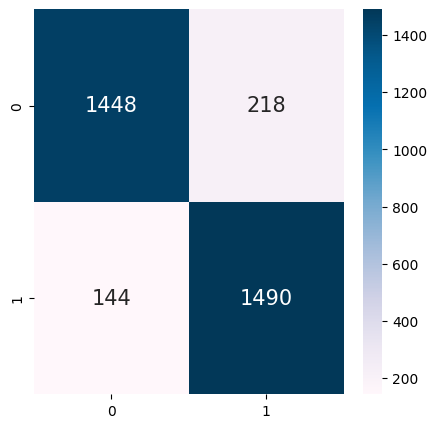

In [99]:
y_pred1 = log.predict(X_test_lda)
print("Classification report:")
print("",classification_report(y_test,y_pred1))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred1)
plt.rcParams['figure.figsize'] = (5, 5)
print('\nConfusion matrix:')
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='.0f')

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8) 
knn.fit(X_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [101]:
y_pred5 =knn.predict(X_test)
knna = accuracy_score(y_test,y_pred5)
accuracy_score(y_test,y_pred5)

0.9363636363636364

In [102]:
for k in range(15):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=k+1) 
    knn.fit(X_train, y_train)
    y_pred5 =knn.predict(X_test)
    knna = accuracy_score(y_test,y_pred5)
    print(k+1,accuracy_score(y_test,y_pred5))

1 0.9712121212121212
2 0.973030303030303
3 0.9536363636363636
4 0.9572727272727273
5 0.9393939393939394
6 0.943939393939394
7 0.9324242424242424
8 0.9363636363636364
9 0.9254545454545454
10 0.9293939393939394
11 0.916969696969697
12 0.9215151515151515
13 0.9148484848484848
14 0.9190909090909091
15 0.9121212121212121


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90      1666
           1       0.85      1.00      0.92      1634

    accuracy                           0.91      3300
   macro avg       0.92      0.91      0.91      3300
weighted avg       0.93      0.91      0.91      3300


Confusion matrix:


<Axes: >

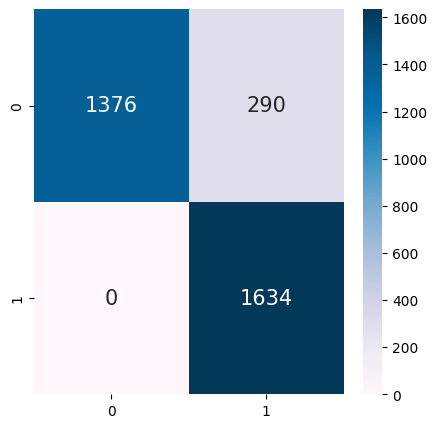

In [103]:
y_pred5 = knn.predict(X_test)
print("Classification report:")
print("",classification_report(y_test,y_pred5))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred5)
plt.rcParams['figure.figsize'] = (5, 5)
print('\nConfusion matrix:')
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='.0f')

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [105]:
y_pred2 = dt.predict(X_test)
dta = accuracy_score(y_test,y_pred2)
accuracy_score(y_test,y_pred2)

0.956060606060606

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1666
           1       0.94      0.97      0.96      1634

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.96      0.96      0.96      3300


Confusion matrix:


<Axes: >

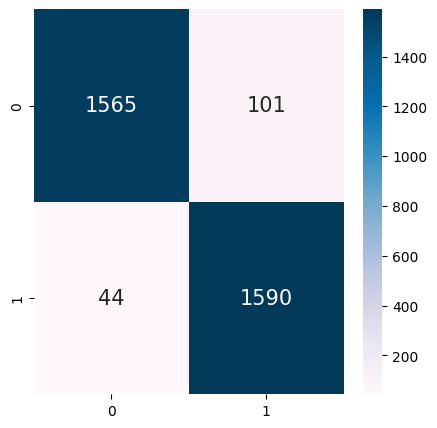

In [106]:
ty_pred2 = dt.predict(X_test)
print("Classification report:")
print("",classification_report(y_test,y_pred2))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred2)
plt.rcParams['figure.figsize'] = (5, 5)
print('\nConfusion matrix:')
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='.0f')

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
y_pred3 = rf.predict(X_test)
rfa = accuracy_score(y_test,y_pred3)
accuracy_score(y_test,y_pred3)                                               

0.9833333333333333

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1666
           1       0.97      1.00      0.98      1634

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300


Confusion matrix:


<Axes: >

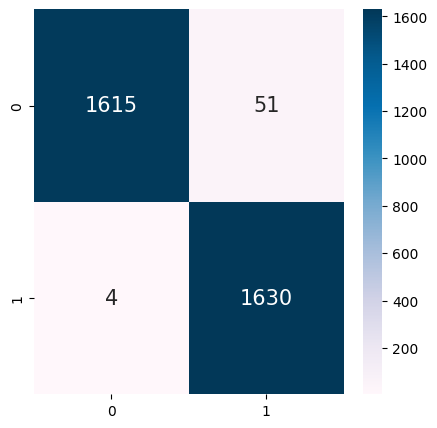

In [109]:
y_pred3 = rf.predict(X_test)
print("Classification report:")
print("",classification_report(y_test,y_pred3))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred3)
plt.rcParams['figure.figsize'] = (5, 5)
print('\nConfusion matrix:')
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='.0f')

In [110]:
#Hyperparameter tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_base = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=10,               # number of random parameter settings to sample
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,               # use all CPUs
    verbose=1
)
rf_random.fit(X_train, y_train)
rf_tuned = rf_random.best_estimator_
print("Best parameters found:", rf_random.best_params_)

y_pred_tuned3 = rf_tuned.predict(X_test)
print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned3))
print("\nClassification Report (Tuned):")
print(classification_report(y_test, y_pred_tuned3))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

Tuned Model Accuracy: 0.980909090909091

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1666
           1       0.97      1.00      0.98      1634

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



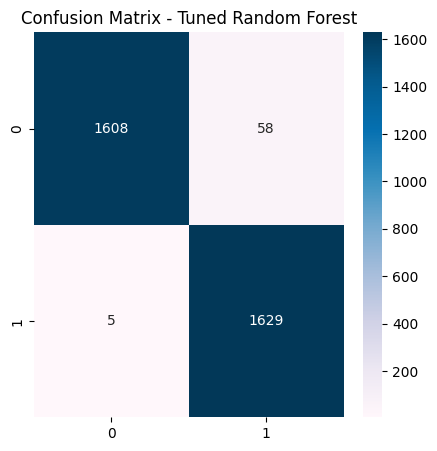

In [114]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned3)
plt.figure(figsize=(5,5))
sns.heatmap(cm_tuned, annot=True, cmap='PuBu', fmt='.0f')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

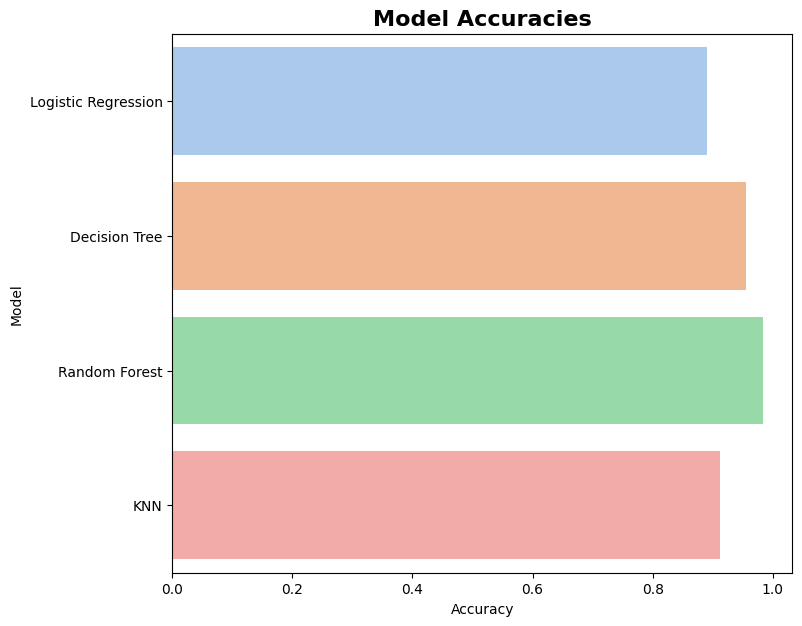

In [112]:
# accuracies
ac = [loga, dta, rfa, knna]  
name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']

acc_df = pd.DataFrame({'Model': name, 'Accuracy': ac})

plt.figure(figsize=(8,7))
sns.barplot(x="Accuracy", y="Model", data=acc_df, palette="pastel")
plt.title("Model Accuracies", fontsize=16, fontweight="bold")
plt.show()


Top Features (Random Forest):
Continuous interest rate (after tax)          0.0582379150
Persistent EPS in the Last Four Seasons       0.0560357251
Non-industry income and expenditure/revenue   0.0530963331
Net profit before tax/Paid-in capital         0.0471192917
Borrowing dependency                          0.0437817321
Pre-tax net Interest Rate                     0.0400427851
Per Share Net profit before tax (Yuan ¥)      0.0345080329
Interest Expense Ratio                        0.0314962113
Net worth/Assets                              0.0290295955
Net Income to Total Assets                    0.0288784020
dtype: float64


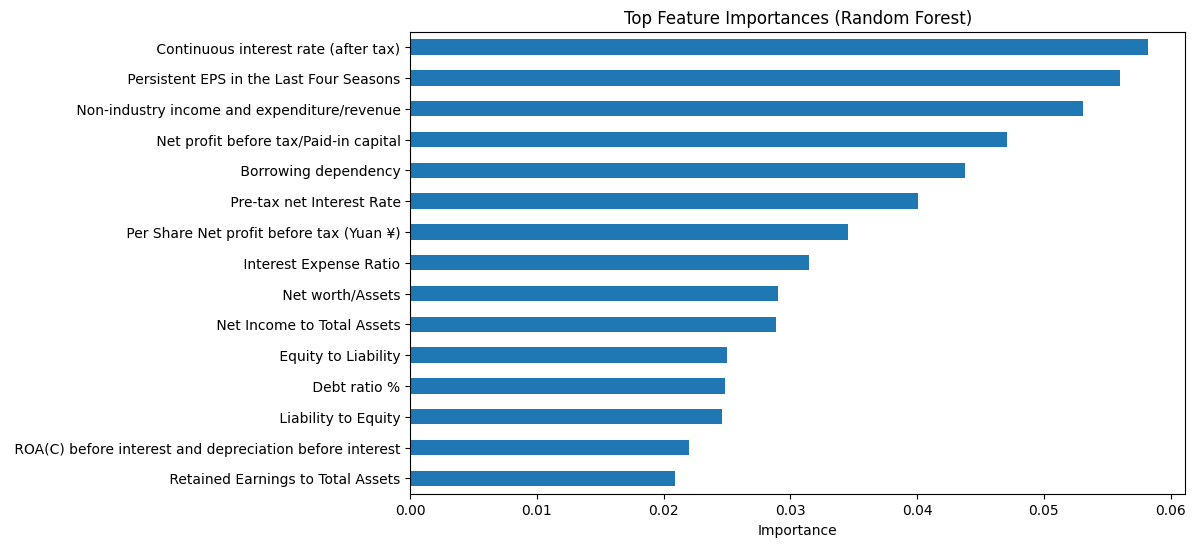

In [122]:
feature_names = df.columns[1:].tolist()
importances = rf.feature_importances_
rf_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Top Features (Random Forest):")
print(rf_importances.head(10))

plt.figure(figsize=(10,6))
rf_importances.head(15).plot(kind='barh')
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

Random Forest performed best with f1-score: 98%